In [33]:
!git clone https://github.com/luckydia/practice-3.git

Cloning into 'practice-3'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 19 (delta 6), reused 13 (delta 5), pack-reused 0
Receiving objects: 100% (19/19), 25.35 KiB | 3.17 MiB/s, done.
Resolving deltas: 100% (6/6), done.


In [35]:
import sys
sys.path.append('/content/practice-3')

In [37]:
from dataloader import load_data, show_img
from model import Net
from train import train
import torch
import torchvision

In [38]:
trainloader, testloader, classes, batch_size = load_data()

Files already downloaded and verified
Files already downloaded and verified


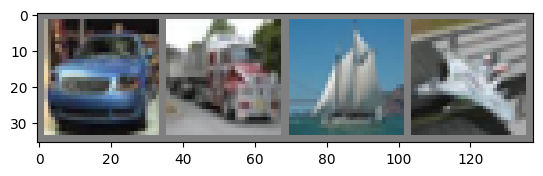

car   truck ship  plane


In [39]:
show_img(trainloader, classes, batch_size)

In [40]:
net = Net()

In [41]:
train(net, trainloader, testloader, classes, batch_size)

[1,  2000] loss: 2.190
[1,  4000] loss: 1.858
[1,  6000] loss: 1.677
[1,  8000] loss: 1.569
[1, 10000] loss: 1.520
[1, 12000] loss: 1.459
[2,  2000] loss: 1.376
[2,  4000] loss: 1.369
[2,  6000] loss: 1.336
[2,  8000] loss: 1.305
[2, 10000] loss: 1.296
[2, 12000] loss: 1.282
Finished Training


In [42]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

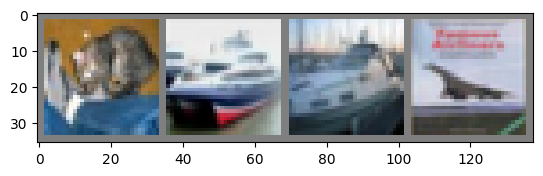

cat   ship  ship  plane


In [43]:
show_img(testloader, classes, batch_size)

In [44]:
dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = net(images)

In [45]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  ship 


In [46]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


In [47]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 41.2 %
Accuracy for class: car   is 61.7 %
Accuracy for class: bird  is 34.6 %
Accuracy for class: cat   is 40.7 %
Accuracy for class: deer  is 53.0 %
Accuracy for class: dog   is 39.4 %
Accuracy for class: frog  is 65.8 %
Accuracy for class: horse is 64.0 %
Accuracy for class: ship  is 82.8 %
Accuracy for class: truck is 66.8 %
